# Index <a class="anchor" id="06.i"></a>

* [Exercise 1](#06.1)
* [Exercise 2](#06.2)
* [Exercise 3](#06.3)

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


## Exercise 1 <a class="anchor" id="06.1"></a>
* [Index](#06.i)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz

np.random.seed(123)

In [2]:
N = 500
mean = 0.0
std = 1.0
x = np.random.normal(loc=mean, scale=std, size=(N))

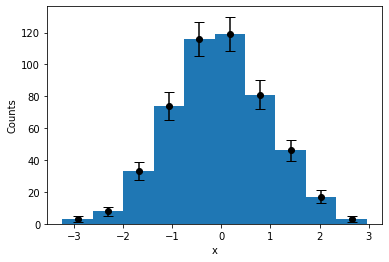

In [3]:
n, bins, _ = plt.hist(x,bins=10)
plt.xlabel("x")
plt.ylabel("Counts")
mid = 0.5*(bins[1:] + bins[:-1])
plt.errorbar(mid, n, yerr=np.sqrt(n), fmt='ko', capsize=5)
plt.show()

bin_width = bins[1] - bins[0]
int_hist = bin_width * sum(n[:])

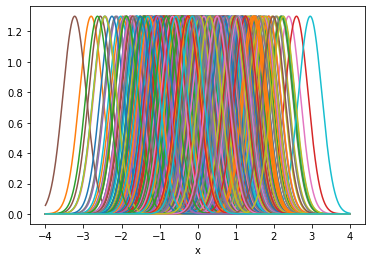

In [4]:
std = 1.06 * x.std() * x.size ** (-1/5.0)
t = np.arange(-4,4,0.001)
f = np.array([norm.pdf(t,x[i],std) for i in range(len(x))])
for i in range(len(x)):
    plt.plot(t,f[i])#norm.pdf(t,x[i],std))
plt.xlabel("x")
plt.show()

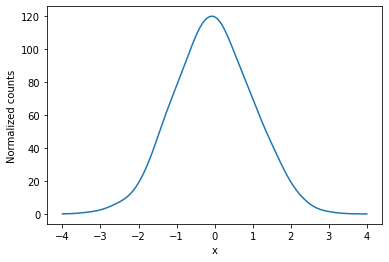

In [5]:
aaa = np.sum(f,axis=0)

int_dist = trapz(aaa,t)
plt.plot(t,aaa*int_hist/int_dist)
plt.xlabel("x")
plt.ylabel("Normalized counts")
plt.show()

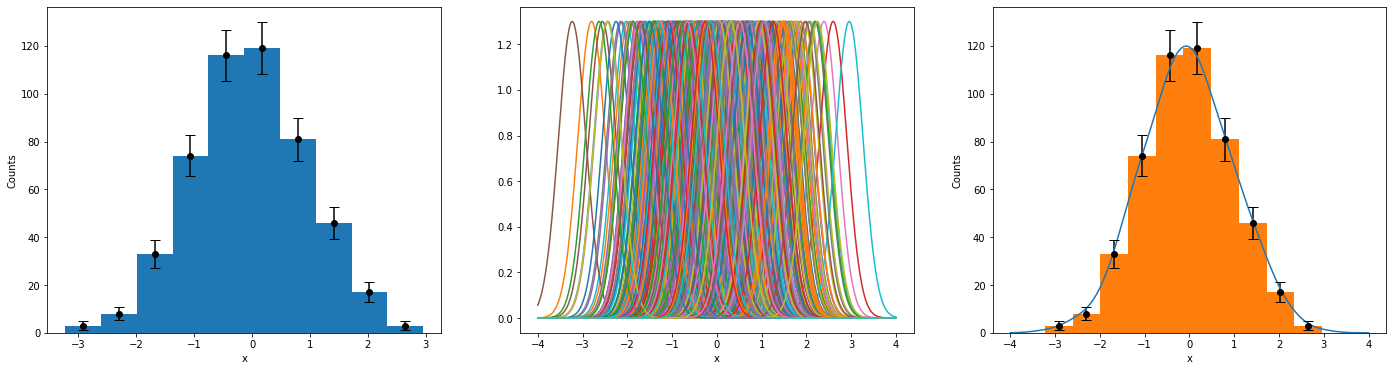

In [6]:
fig = plt.figure(figsize=(24,6))
plt.subplot(1, 3, 1)
n, bins, _ = plt.hist(x,bins=10)
plt.xlabel("x")
plt.ylabel("Counts")
mid = 0.5*(bins[1:] + bins[:-1])
plt.errorbar(mid, n, yerr=np.sqrt(n), fmt='ko', capsize=5)
bin_width = bins[1] - bins[0]
int_hist = bin_width * sum(n[:])

plt.subplot(1, 3, 2)
std = 1.06 * x.std() * x.size ** (-1/5.0)
t = np.arange(-4,4,0.001)
f = np.array([norm.pdf(t,x[i],std) for i in range(len(x))])
plt.xlabel("x")
for i in range(len(x)):
    plt.plot(t,f[i])
    
plt.subplot(1, 3, 3)
aaa = np.sum(f,axis=0)
int_dist = trapz(aaa,t)
plt.plot(t,aaa*int_hist/int_dist)
plt.hist(x,bins=10)
plt.xlabel("x")
plt.ylabel("Counts")
plt.errorbar(mid, n, yerr=np.sqrt(n), fmt='ko', capsize=5)

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

## Exercise 2 <a class="anchor" id="06.2"></a>
* [Index](#06.i)

--2020-09-24 16:04:31--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2020-09-24 16:04:31--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ea31a7e68bd0605f25e3a07dd.dl.dropboxusercontent.com/cd/0/inline/BABbaPIiKblRXesMpF6WiRVkhpH6f-aSM8LHgvMcz6fNICWY73bjvj9zS0H-771DHEIw941qYIbcDqYn1nJ4ufgHLfy-jD6j0M-c_jeNBwv2WA/file# [following]
--2020-09-24 16:04:32--  https://uc3ea31a7e68bd0605f25e3a07dd.dl.dropboxusercontent.com/cd/0/inline/BABbaPIiKblRXesMpF6WiRVkhpH6f-aSM8LHgvMcz6fNICWY73bjvj9zS0H-771DHEIw941qYIb

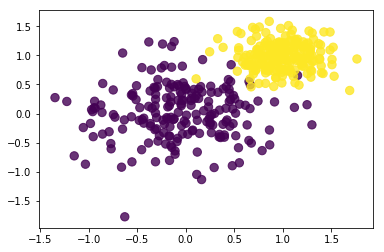

In [7]:
from IPython.display import Image
import os.path

if not os.path.isfile('data/ex06/two_categories_scatter_plot.png'):
    ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png -P data/06ex/

Image('data/06ex/two_categories_scatter_plot.png')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz

np.random.seed(123)

Text(0, 0.5, 'y')

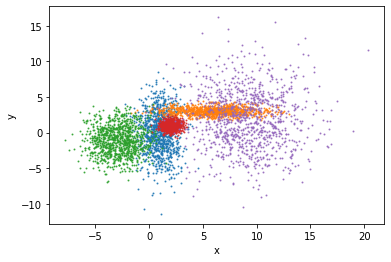

In [9]:
N = 1000
n = 5
mean = [
    [1.0, 0.0],
    [6.0, 3.0],
    [-3.0, -1.0],
    [2.0, 1.0],
    [9.0, 2.0]
]
std = [
    [1.0, 3.0],
    [2.5, 0.5],
    [1.5, 2.0],
    [0.5, 0.5],
    [2.8, 4.0]
]

x = []
y = []

for i in range(n):
    x.append(np.random.normal(loc=mean[i][0], scale=std[i][0], size=(N)))
    y.append(np.random.normal(loc=mean[i][1], scale=std[i][1], size=(N)))

for i in range(n):
    plt.scatter(x[i], y[i], 1, alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

## Exercise 3 <a class="anchor" id="06.3"></a>
* [Index](#06.i)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, linregress
from scipy.integrate import trapz

np.random.seed(123)

In [11]:
import os.path

if not os.path.isfile('data/06ex/residuals_261.npy'):
    ! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy -P data/06ex/

--2020-09-24 16:04:33--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2020-09-24 16:04:33--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc646895ebe3806ef07d161502a2.dl.dropboxusercontent.com/cd/0/inline/BADB1_QDIOfSNeqg9Gewvejc_OYjPPi9jx4gMwo08xZ1hmoVyKpHng43Las9iU-EU7P9Bioc8pJc0IJTEhq7Ch6cp48QR9Y4qAiz8mXMeivv3A/file# [following]
--2020-09-24 16:04:33--  https://uc646895ebe3806ef07d161502a2.dl.dropboxusercontent.com/cd/0/inline/BADB1_QDIOfSNeqg9Gewvejc_OYjPPi9jx4gMwo08xZ1hmoVyKpHng43Las9iU-EU7P9Bioc8pJc0IJTEhq7Ch6cp48QR9Y4qAiz8mXMeivv3A/file
R

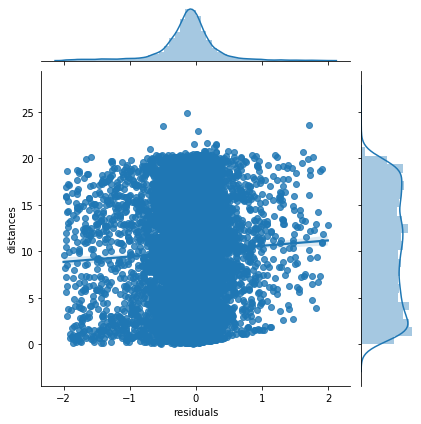

In [12]:
df_1 = pd.DataFrame(np.load("data/06ex/residuals_261.npy", allow_pickle=True).item())
df_2 = df_1[np.abs(df_1['residuals']) < 2]

m, q, r, p, _ = linregress(df_2)

x_p = df_2['residuals'][:].to_numpy()
y_p = df_2['distances'][:].to_numpy()

xs = np.arange(-2,2,0.01)
sns.jointplot(x="residuals", y="distances", data=df_2, kind='reg')

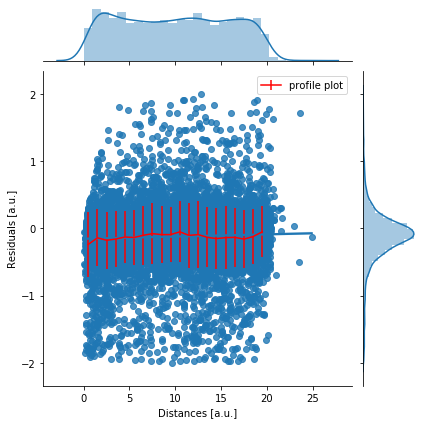

In [13]:
nbins = 20
x = np.zeros(nbins)
y = np.zeros(nbins)
erry = np.zeros(nbins)
x_edge = np.linspace(0,20,nbins+1)
x = (x_edge[1:] + x_edge[:-1])/2


for x_inf,x_sup,i in zip(x_edge[:-1],x_edge[1:],range(nbins)):
    y_slice = x_p[np.logical_and((y_p>=x_inf), (y_p<=x_sup))]
    y[i] = np.mean(y_slice)
    erry[i] = np.std(y_slice)


a = sns.jointplot(x="distances", y="residuals", data=df_2, kind='reg')
plt.errorbar(x,y,yerr=erry, label='profile plot', color='r')
plt.xlabel('Distances [a.u.]')
plt.ylabel('Residuals [a.u.]')
a.ax_joint.legend()